# Content Based Recommender Systems

In [ ]:
!pip install sentence-transformers


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.5/149.5 kB 3.2 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Load the dataset
data = pd.read_csv('/content/drive/My Drive/CIS 509/dataset_for_topic_modelling2.csv')
data.head()


Mounted at /content/drive


,business_id,name,state,city,categories,attributes,user_id,useful,text,review_id
0,9C2rpb56aQvW0ViZHK9sPw,Home Plate Sports Pub,AZ,Tucson,"Bars, Restaurants, Sports Bars, Nightlife","{'RestaurantsGoodForGroups': 'True', 'Alcohol'...",cjLp1QarHZb_SCf6xJmIWQ,5,"Great place to meet friends for a meal, and ma...",8p01KvWxArjQWv5o9o3Kdg
1,9C2rpb56aQvW0ViZHK9sPw,Home Plate Sports Pub,AZ,Tucson,"Bars, Restaurants, Sports Bars, Nightlife","{'RestaurantsGoodForGroups': 'True', 'Alcohol'...",h_9gTh9rzzJQb61TbB6QFg,4,Ok. I've literally been going here since I was...,QRAJQOOR8OvMjatVi9YdKg
2,9C2rpb56aQvW0ViZHK9sPw,Home Plate Sports Pub,AZ,Tucson,"Bars, Restaurants, Sports Bars, Nightlife","{'RestaurantsGoodForGroups': 'True', 'Alcohol'...",38sIAC83IlRNoG_q6ETr9w,4,My two friends and I were looking to have a ch...,KrI8KYSzsWBfNg08sgjoYw
3,9C2rpb56aQvW0ViZHK9sPw,Home Plate Sports Pub,AZ,Tucson,"Bars, Restaurants, Sports Bars, Nightlife","{'RestaurantsGoodForGroups': 'True', 'Alcohol'...",2trMPz0U5CgOjzE9D_NCCQ,3,The waitress was rude from the start. I work i...,ZQ5LZ40IQWx6kIUf0yFjgA
4,9C2rpb56aQvW0ViZHK9sPw,Home Plate Sports Pub,AZ,Tucson,"Bars, Restaurants, Sports Bars, Nightlife","{'RestaurantsGoodForGroups': 'True', 'Alcohol'...",lrgq-Gr-l8m0v5WEmVXP6g,3,This dive bar is okay. \n\npros: \ncheap\nbatt...,k4JRsrQP8iW9J3BRq-YHkQ


In [ ]:
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity

# Encode text using SentenceTransformer
X = np.array(data.text)
text_data = X
model = SentenceTransformer('distilbert-base-nli-mean-tokens')
embeddings = model.encode(text_data, show_progress_bar=True)
embed_data = embeddings
X = np.array(embed_data)

# Perform PCA
n_comp = 5
pca = PCA(n_components=n_comp)
pca.fit(X)
pca_data = pd.DataFrame(pca.transform(X))
pca_data.head()


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.02k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/550 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/265M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


tokenizer_config.json:   0%|          | 0.00/450 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/59 [00:00<?, ?it/s]

,0,1,2,3,4
0,4.698258,-0.945333,1.088857,-0.748921,0.976998
1,-0.257671,-1.192397,-3.597512,-0.616758,2.140810
2,-3.674085,-2.545297,0.289375,-0.020661,-2.735006
3,-7.181435,-2.891445,1.673896,2.389246,-0.471298
4,0.558409,-0.774486,4.783887,-5.114485,0.726988


In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/My Drive/CIS 509/dataset_for_topic_modelling2.csv')
data.head()

,business_id,name,state,city,categories,attributes,user_id,useful,text,review_id
0,9C2rpb56aQvW0ViZHK9sPw,Home Plate Sports Pub,AZ,Tucson,"Bars, Restaurants, Sports Bars, Nightlife","{'RestaurantsGoodForGroups': 'True', 'Alcohol'...",cjLp1QarHZb_SCf6xJmIWQ,5,"Great place to meet friends for a meal, and ma...",8p01KvWxArjQWv5o9o3Kdg
1,9C2rpb56aQvW0ViZHK9sPw,Home Plate Sports Pub,AZ,Tucson,"Bars, Restaurants, Sports Bars, Nightlife","{'RestaurantsGoodForGroups': 'True', 'Alcohol'...",h_9gTh9rzzJQb61TbB6QFg,4,Ok. I've literally been going here since I was...,QRAJQOOR8OvMjatVi9YdKg
2,9C2rpb56aQvW0ViZHK9sPw,Home Plate Sports Pub,AZ,Tucson,"Bars, Restaurants, Sports Bars, Nightlife","{'RestaurantsGoodForGroups': 'True', 'Alcohol'...",38sIAC83IlRNoG_q6ETr9w,4,My two friends and I were looking to have a ch...,KrI8KYSzsWBfNg08sgjoYw
3,9C2rpb56aQvW0ViZHK9sPw,Home Plate Sports Pub,AZ,Tucson,"Bars, Restaurants, Sports Bars, Nightlife","{'RestaurantsGoodForGroups': 'True', 'Alcohol'...",2trMPz0U5CgOjzE9D_NCCQ,3,The waitress was rude from the start. I work i...,ZQ5LZ40IQWx6kIUf0yFjgA
4,9C2rpb56aQvW0ViZHK9sPw,Home Plate Sports Pub,AZ,Tucson,"Bars, Restaurants, Sports Bars, Nightlife","{'RestaurantsGoodForGroups': 'True', 'Alcohol'...",lrgq-Gr-l8m0v5WEmVXP6g,3,This dive bar is okay. \n\npros: \ncheap\nbatt...,k4JRsrQP8iW9J3BRq-YHkQ


In [ ]:
# Concatenate text, attributes, and categories for each data instance
text_data = data['text'] + ' ' + data['attributes'] + ' ' + data['categories']

# Encode concatenated data using SentenceTransformer
model = SentenceTransformer('distilbert-base-nli-mean-tokens')
embeddings = model.encode(text_data, show_progress_bar=True)

# Perform PCA if needed
n_comp = 5
pca = PCA(n_components=n_comp)
pca.fit(embeddings)
pca_data = pd.DataFrame(pca.transform(embeddings))

# Compute cosine similarity matrix
cos_sim_data = pd.DataFrame(cosine_similarity(pca_data))


Batches:   0%|          | 0/59 [00:00<?, ?it/s]

In [ ]:
# Create a DataFrame for cosine similarity
cos_sim_data = pd.DataFrame(cosine_similarity(X))


In [ ]:
def give_recommendations(index, print_recommendation=False, print_review=False, print_stars=False):
    index_recomm = cos_sim_data.loc[index].sort_values(ascending=False).index.tolist()[1:6]  # Get top 5 recommended indices
    businesses_recomm = data.loc[index_recomm]  # Get recommended businesses based on indices

    unique_businesses = set()  # Set to store unique recommended businesses

    result = {'Businesses': [], 'Index': index_recomm}

    if print_recommendation:
        print('The watched business is: %s\n' % data['name'].loc[index])
        for i, business in enumerate(businesses_recomm.iterrows(), start=1):
            business_id = business[0]
            business_data = business[1]
            if business_id != index and business_id not in unique_businesses:  # Check if business is not watched and not already recommended
                print(f"Recommended Business {i}: {business_data['name']}")
                print(f"Attributes: {business_data['attributes']}")  # Print business attributes
                print(f"Categories: {business_data['categories']}")  # Print business categories
                unique_businesses.add(business_id)  # Add business to set of unique businesses
                result['Businesses'].append(business_data['name'])  # Add business to result

    if print_review:
        print('\nThe review of the watched business is:\n%s\n' % data['text'].loc[index])
        for i, idx in enumerate(index_recomm, start=1):
            print('Review of Recommended Business %d (%s):\n%s\n' % (i, data['name'].loc[idx], data['text'].loc[idx]))

    if print_stars and 'stars' in data.columns:  # Check if 'stars' column exists in the dataset
        print('\nThe stars of the watched business is: %s\n' % data['stars'].loc[index])
        for i, idx in enumerate(index_recomm, start=1):
            print('Stars of Recommended Business %d (%s): %s\n' % (i, data['name'].loc[idx], data['stars'].loc[idx]))

    return result



The watched business is: Outback Steakhouse

Recommended Business 1: Sauce Pizza & Wine
Attributes: {'Alcohol': "u'beer_and_wine'", 'OutdoorSeating': 'True', 'BusinessAcceptsCreditCards': 'True', 'WiFi': "'no'", 'BusinessParking': "{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}", 'GoodForKids': 'True', 'Caters': 'True', 'NoiseLevel': "u'average'", 'RestaurantsAttire': "u'casual'", 'BikeParking': 'False', 'RestaurantsGoodForGroups': 'True', 'RestaurantsReservations': 'False', 'RestaurantsDelivery': 'True', 'RestaurantsTakeOut': 'True', 'HasTV': 'False', 'RestaurantsPriceRange2': '2', 'GoodForMeal': "{'dessert': None, 'latenight': False, 'lunch': True, 'dinner': True, 'brunch': False, 'breakfast': False}", 'BestNights': "{'monday': False, 'tuesday': False, 'friday': False, 'wednesday': False, 'thursday': False, 'sunday': False, 'saturday': False}", 'Ambience': "{u'divey': False, u'hipster': False, u'casual': True, u'touristy': False, u'trendy': True, 

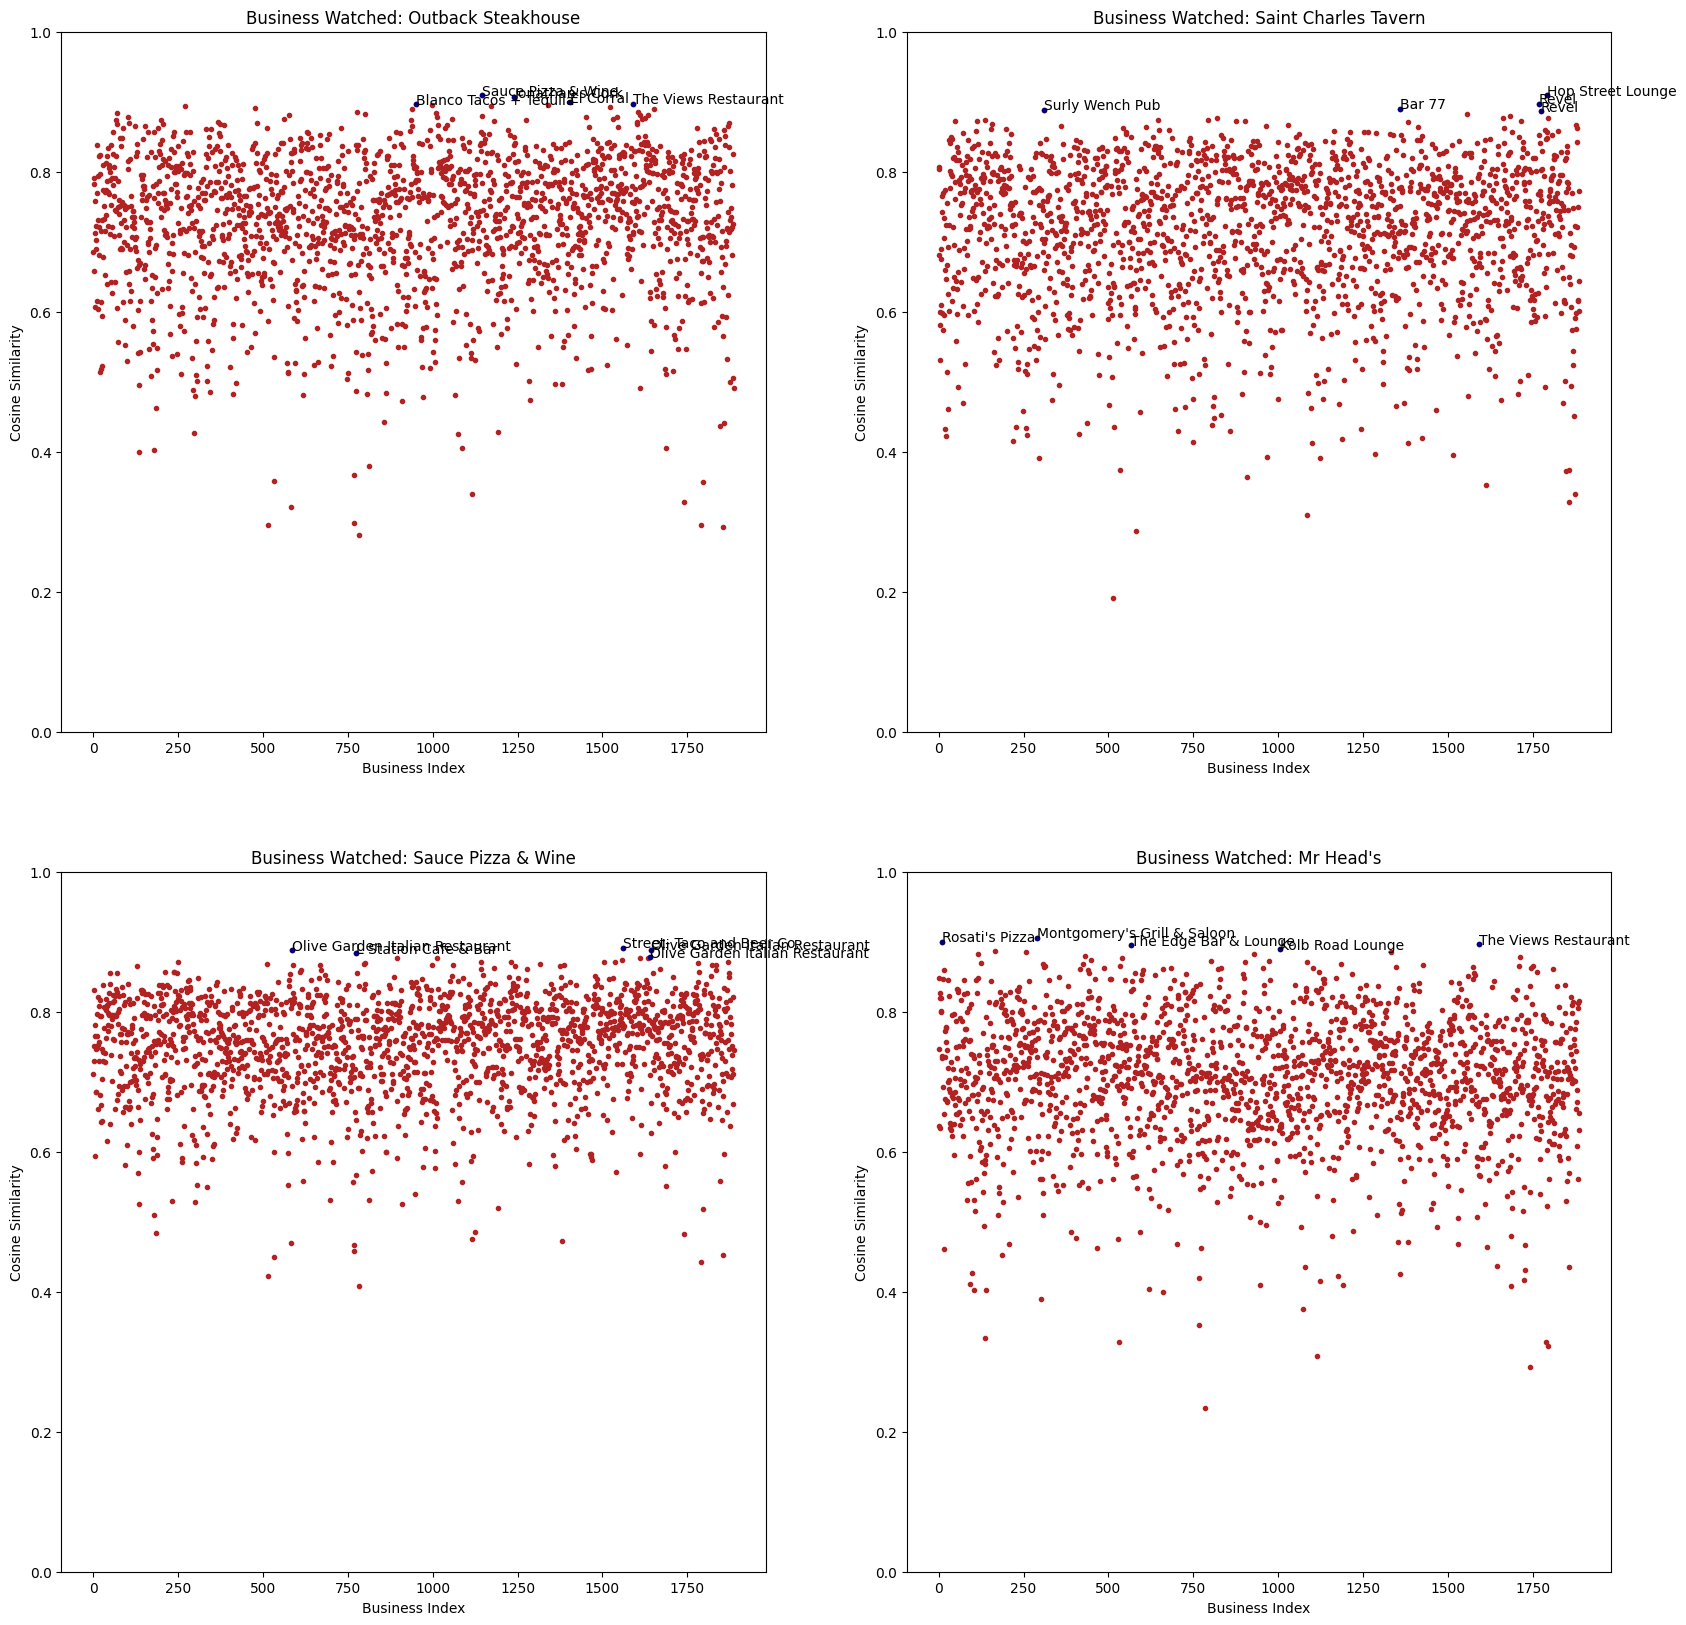

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))

for q in range(1, 5):
    plt.subplot(2, 2, q)
    index = np.random.choice(np.arange(0, len(X)))
    to_plot_data = cos_sim_data.drop(index, axis=1)
    plt.plot(to_plot_data.loc[index], '.', color='firebrick')
    recomm_index = give_recommendations(index, print_recommendation=True)
    x = recomm_index['Index']
    y = cos_sim_data.loc[index][x].tolist()
    m = recomm_index['Businesses']
    plt.plot(x, y, '.', color='navy', label='Recommended Businesses')
    plt.title('Business Watched: ' + data['name'].loc[index])  # Changed from business_id to name
    plt.xlabel('Business Index')
    k = 0
    for x_i, business in zip(x, m):  # Use zip to iterate over both x and m simultaneously
        plt.annotate('%s' % (business), (x_i, y[k]), fontsize=10)
        k += 1

    plt.ylabel('Cosine Similarity')
    plt.ylim(0, 1)

plt.show()





In [ ]:
import pandas as pd
import random
from tabulate import tabulate

# Assuming you have a dataset named 'data' and a cosine similarity matrix named 'cos_sim_data'

def give_recommendations(index, data, cos_sim_data, print_recommendation=False, print_review=False, print_stars=False):
    index_recomm = cos_sim_data.loc[index].sort_values(ascending=False).index.tolist()[1:6]  # Get top 5 recommended indices
    businesses_recomm = data.loc[index_recomm]  # Get recommended businesses based on indices

    watched_business = data['name'].loc[index]  # Get the name of the watched business

    unique_businesses = set()  # Set to store unique recommended businesses

    recommendations = {'Watched Business': [watched_business], 'Recommendation 1': '', 'Recommendation 2': '', 'Recommendation 3': '', 'Recommendation 4': '', 'Recommendation 5': ''}

    i = 1
    for business_id, business_data in businesses_recomm.iterrows():
        if business_id != index and business_data['name'] != watched_business and business_id not in unique_businesses:  # Check if business is not watched, not already recommended, and not the same as watched business
            recommendations[f'Recommendation {i}'] = business_data['name']  # Add business to recommendations
            unique_businesses.add(business_id)  # Add business to set of unique businesses
            i += 1
            if i > 5:
                break

    recommendations_df = pd.DataFrame(recommendations)
    recommendations_df = recommendations_df.fillna('')  # Replace any NaN values with empty string
    if print_recommendation:
        print(recommendations_df)
    return recommendations_df

# Display 5 watched businesses and their corresponding recommendations
for _ in range(5):
    random_watched_business_index = random.randint(0, len(data) - 1)
    watched_business = data.loc[random_watched_business_index, 'name']

    print(f"\nRecommendations for watched business: {watched_business}\n")
    recommendations_df = give_recommendations(index=random_watched_business_index, data=data, cos_sim_data=cos_sim_data)
    print(tabulate(recommendations_df, headers='keys', tablefmt='fancy_grid'))









Recommendations for watched business: Prep & Pastry

╒════╤════════════════════╤════════════════════╤════════════════════╤════════════════════╤════════════════════╤════════════════════╕
│    │ Watched Business   │ Recommendation 1   │ Recommendation 2   │ Recommendation 3   │ Recommendation 4   │ Recommendation 5   │
╞════╪════════════════════╪════════════════════╪════════════════════╪════════════════════╪════════════════════╪════════════════════╡
│  0 │ Prep & Pastry      │ 47 Scott           │ 47 Scott           │ Jonathan's Cork    │ Sauce Pizza & Wine │                    │
╘════╧════════════════════╧════════════════════╧════════════════════╧════════════════════╧════════════════════╧════════════════════╛

Recommendations for watched business: Street Taco And Beer

╒════╤══════════════════════╤═══════════════════════════╤═══════════════════════════╤════════════════════╤════════════════════════════════╤═══════════════════════════╕
│    │ Watched Business     │ Recommendation 1      

In [ ]:
X = np.array(data.text)

In [ ]:
embed_data = embeddings
X = np.array(embed_data)
n_comp = 5
pca = PCA(n_components=n_comp)
pca.fit(X)
pca_data = pd.DataFrame(pca.transform(X))
pca_data.head()

,0,1,2,3,4
0,-4.695210,1.180537,0.817884,0.532563,0.563139
1,0.310321,0.778512,-3.605672,1.835623,1.957108
2,3.961683,2.175078,-0.909368,-1.471892,-2.921431
3,6.787308,2.702688,1.369072,-2.304927,0.666740
4,-1.430163,1.816898,5.652262,3.109669,-1.473004
